<a href="https://colab.research.google.com/github/Sravani-05/Clustering-assignment/blob/main/DB_Scan_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DB Scan Clustering (not from scratch) using pycaret library**

In [39]:
#load the necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [40]:
! pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
#load the input data
mall_customers=pd.read_csv("/content/Mall_Customers.csv")
     

In [42]:
mall_customers.shape

(200, 5)

In [43]:
mall_customers.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [44]:
mall_customers.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [45]:
mall_customers.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [47]:
mall_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Colab mode enabled.


In [50]:
# importing colab model
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [52]:
mall_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
data = mall_customers.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_notused = mall_customers.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_notused.shape))

Data for Modeling: (190, 5)
Unseen Data For Predictions: (10, 5)


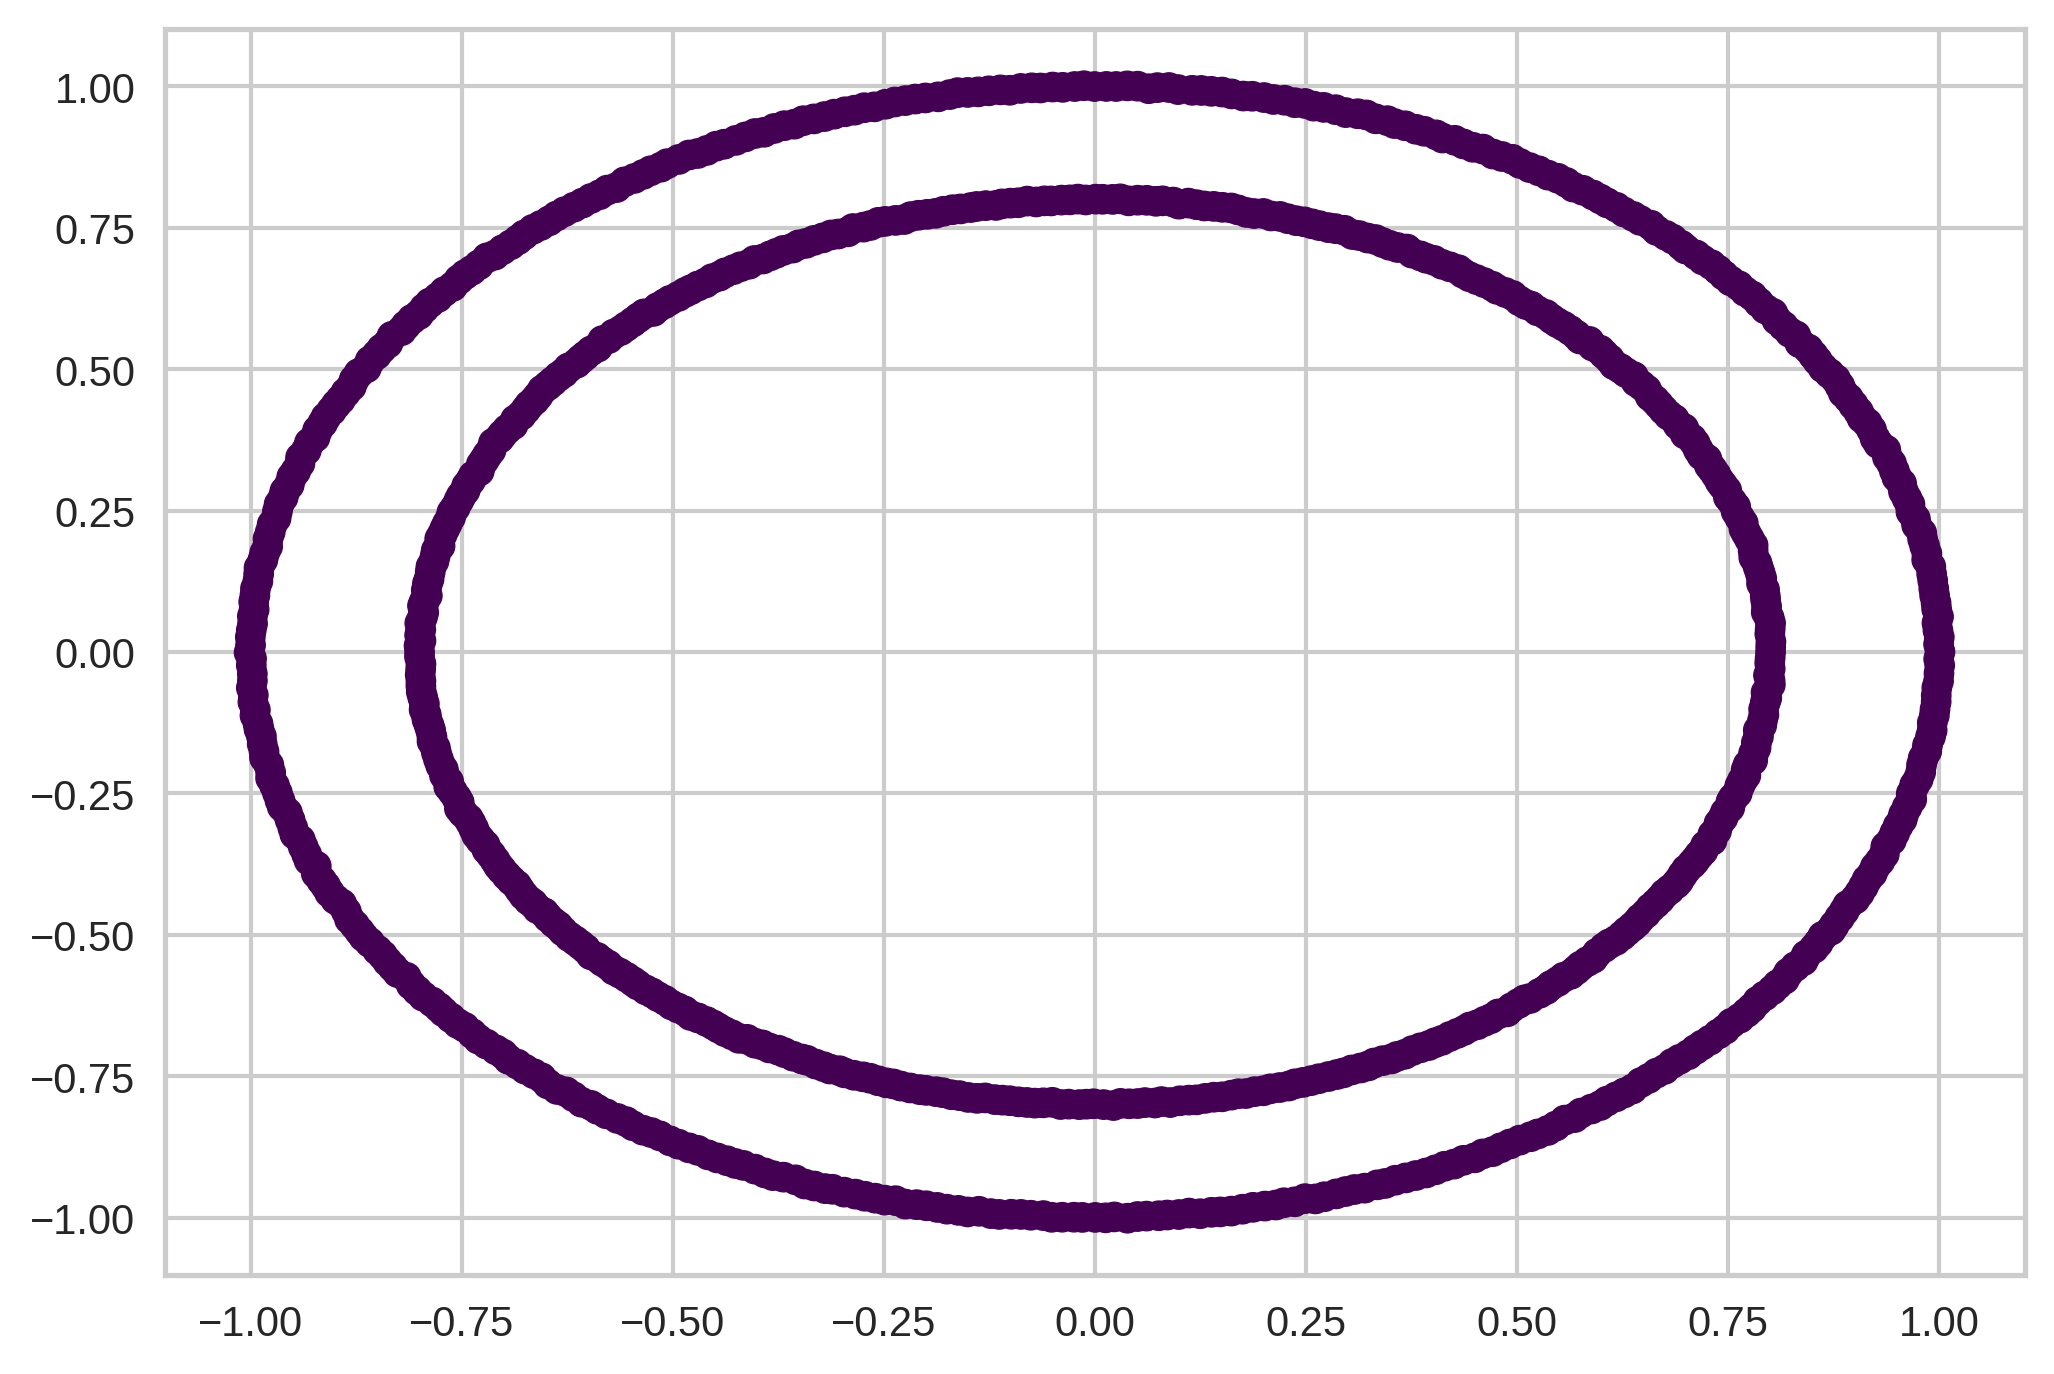

In [54]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN()
dbscan_labels = dbscan_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=50, cmap='viridis');